We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [14]:
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.arange(1, 13)

In [15]:
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

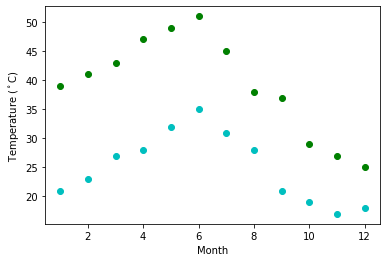

In [25]:
plt.plot(month, max_temp, 'go')
plt.plot(month, min_temp, 'co')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [26]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      min_temp, [-40, 20, 0])

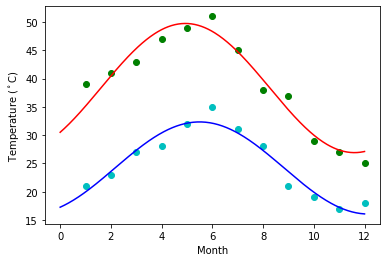

In [107]:

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, max_temp, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, min_temp, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [31]:
import pandas as pd

In [93]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [94]:
titanic = pd.read_csv(url)

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [95]:
titanic = titanic.dropna(subset=['sex'])


In [96]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [97]:
by_sex = titanic['sex'].value_counts()
by_sex

male      843
female    466
Name: sex, dtype: int64

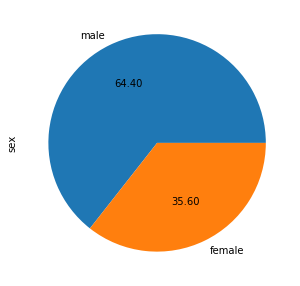

In [98]:
plot = by_sex.plot.pie(figsize=(5, 5), autopct = '%.2f')

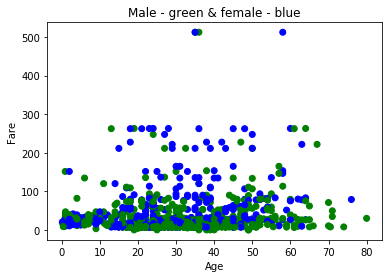

In [106]:
colors = {'male':'green', 'female':'blue'}
plt.scatter(titanic['age'], titanic['fare'], c = titanic['sex'].apply(lambda x: colors[x]))
plt.title('Male - green & female - blue')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()